# Мобильное приложение продажи продуктов питания

**Описание проекта**

Необходимо исследовать пользовательское поведение мобильного приложения.

Изучить воронку продаж - как пользователи доходят до покупки. Сколько пользователей доходит до покупки, а сколько — «застревает» на предыдущих шагах? На каких именно?

Необходимо исследовать результаты A/A/B-эксперимента. Дизайнеры захотели поменять шрифты во всём приложении, а менеджеры испугались, что пользователям будет непривычно. Договорились принять решение по результатам A/A/B-теста. Пользователей разбили на 3 группы: 2 контрольные со старыми шрифтами и одну экспериментальную — с новыми. Нужно выяснить, какой шрифт лучше. Создание двух групп A вместо одной имеет определённые преимущества. Если две контрольные группы окажутся равны, можно быть увереным в точности проведенного тестирования. Если же между значениями A и A будут существенные различия, это поможет обнаружить факторы, которые привели к искажению результатов. Сравнение контрольных групп также помогает понять, сколько времени и данных потребуется для дальнейших тестов.

**Цель проекта**
1. Изучить воронку продаж
2. Исследовать результаты A/A/B-эксперимента

# Структура проекта

**Шаг 1.** Откройте файл с данными и изучите общую информацию

**Шаг 2.** Подготовьте данные

* Замените названия столбцов на удобные для вас;
* Проверьте пропуски и типы данных. Откорректируйте, если нужно;
* Добавьте столбец даты и времени, а также отдельный столбец дат;

**Шаг 3.** Изучите и проверьте данные

* Сколько всего событий в логе?
* Сколько всего пользователей в логе?
* Сколько в среднем событий приходится на пользователя?
* Данными за какой период вы располагаете? Найдите максимальную и минимальную дату. Постройте гистограмму по дате и времени. Можно ли быть уверенным, что у вас одинаково полные данные за весь период? Технически в логи новых дней по некоторым пользователям могут «доезжать» события из прошлого — это может «перекашивать данные». Определите, с какого момента данные полные и отбросьте более старые. Данными за какой период времени вы располагаете на самом деле?
*  Много ли событий и пользователей вы потеряли, отбросив старые данные? 
* Проверьте, что у вас есть пользователи из всех трёх экспериментальных групп.

**Шаг 4.** Изучите воронку событий
* Посмотрите, какие события есть в логах, как часто они встречаются. Отсортируйте события по частоте.
* Посчитайте, сколько пользователей совершали каждое из этих событий. Отсортируйте события по числу пользователей. Посчитайте долю пользователей, которые хоть раз совершали событие.
* Предположите, в каком порядке происходят события. Все ли они выстраиваются в последовательную цепочку? Их не нужно учитывать при расчёте воронки.
* По воронке событий посчитайте, какая доля пользователей проходит на следующий шаг воронки (от числа пользователей на предыдущем). То есть для последовательности событий A → B → C посчитайте отношение числа пользователей с событием B к количеству пользователей с событием A, а также отношение числа пользователей с событием C к количеству пользователей с событием B.
* На каком шаге теряете больше всего пользователей?
* Какая доля пользователей доходит от первого события до оплаты?

**Шаг 5.** Изучите результаты эксперимента
* Сколько пользователей в каждой экспериментальной группе?
* Есть 2 контрольные группы для А/А-эксперимента, чтобы проверить корректность всех механизмов и расчётов. Проверьте, находят ли статистические критерии разницу между выборками 246 и 247.
* Выберите самое популярное событие. Посчитайте число пользователей, совершивших это событие в каждой из контрольных групп. Посчитайте долю пользователей, совершивших это событие. Проверьте, будет ли отличие между группами статистически достоверным. Проделайте то же самое для всех других событий (удобно обернуть проверку в отдельную функцию). Можно ли сказать, что разбиение на группы работает корректно?
* Аналогично поступите с группой с изменённым шрифтом. Сравните результаты с каждой из контрольных групп в отдельности по каждому событию. Сравните результаты с объединённой контрольной группой. Какие выводы из эксперимента можно сделать?
* Какой уровень значимости вы выбрали при проверке статистических гипотез выше? Посчитайте, сколько проверок статистических гипотез вы сделали. При уровне значимости 0.1 каждый десятый раз можно получать ложный результат. Какой уровень значимости стоит применить? Если вы хотите изменить его, проделайте предыдущие пункты и проверьте свои выводы.

**Оглавление:**
<a id='section_id'></a>

1. [Импорт библиотек и загрузка данных](#section_id1)
2. [Предобработка данных](#section_id2)
3. [Исследовательский анализ данных (EDA)](#section_id3)
4. [Воронка событий](#section_id4)
5. [Результаты исследования](#section_id5)

## Импорт библиотек и загрузка данных
<a id='section_id1'></a>

In [1]:
import pandas as pd
import numpy as np
from scipy import stats as st
import math as mth
import datetime 

import matplotlib.pyplot as plt 
import seaborn as sns
from plotly import graph_objects as go

from IPython.display import display, HTML

In [2]:
# Причёсываю формат отображения данных - отображение всех колонок и ограничиваю количество знаков после запятой
pd.set_option('display.max_columns', None)
pd.options.display.float_format = '{:,.2f}'.format
pd.options.display.max_colwidth = 50
# формат отображения ячеек с кодом:
display(HTML("<style>.container{width:70% !important;}</style"))

# форматирую вывод графиков
sns.set(rc={'figure.figsize':(10, 6)})
sns.set_style('whitegrid')

In [3]:
data_logs = pd.read_csv('/datasets/logs_exp.csv', sep='\t')

### Обзор данных

In [4]:
data_logs.head(3)

,EventName,DeviceIDHash,EventTimestamp,ExpId
0,MainScreenAppear,4575588528974610257,1564029816,246
1,MainScreenAppear,7416695313311560658,1564053102,246
2,PaymentScreenSuccessful,3518123091307005509,1564054127,248


In [5]:
data_logs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244126 entries, 0 to 244125
Data columns (total 4 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   EventName       244126 non-null  object
 1   DeviceIDHash    244126 non-null  int64 
 2   EventTimestamp  244126 non-null  int64 
 3   ExpId           244126 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 7.5+ MB


**Вывод:**

Пропусков в датасете нет, в рамках предобработки:
* переименую названия столбцов, 
* приведу данные в колонке `EventName` к нижнему регистру, 
* на основании колонки `EventTimestamp` сформирую дополнительные столбцы с датой и временем, 
* проверю явные дубликаты.

## Предобработка данных
<a id='section_id2'></a>

In [6]:
# Переименую колонки на понятные по смыслу и приведу к нижнему регистру:
data_logs = data_logs.rename(columns={
    'EventName': 'event_name'
    ,'DeviceIDHash': 'user_id'
    ,'EventTimestamp': 'event_timestamp'
    ,'ExpId': 'exp_id'
})

# Приведу данные в колонке к нижнему регистру:
data_logs['event_name'] = data_logs['event_name'].str.lower()

# Сформирую дополнительные столбцы с датой и временем, а также отдельно с датой:
data_logs['date_time'] = pd.to_datetime(data_logs['event_timestamp'], unit='s')
data_logs['date'] = data_logs['date_time'].astype('datetime64[D]')

# Переведу тип данных в колонке exp_id из int64 в int32 для экономии памяти:
data_logs['exp_id'] = data_logs['exp_id'].astype(np.int32)

# Проверю типы данных в новых колонках после преобразований:
data_logs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244126 entries, 0 to 244125
Data columns (total 6 columns):
 #   Column           Non-Null Count   Dtype         
---  ------           --------------   -----         
 0   event_name       244126 non-null  object        
 1   user_id          244126 non-null  int64         
 2   event_timestamp  244126 non-null  int64         
 3   exp_id           244126 non-null  int32         
 4   date_time        244126 non-null  datetime64[ns]
 5   date             244126 non-null  datetime64[ns]
dtypes: datetime64[ns](2), int32(1), int64(2), object(1)
memory usage: 10.2+ MB


In [7]:
# Посмотрю как выглядит датафрейм после преобразований:
data_logs.head(3)

,event_name,user_id,event_timestamp,exp_id,date_time,date
0,mainscreenappear,4575588528974610257,1564029816,246,2019-07-25 04:43:36,2019-07-25 04:43:36
1,mainscreenappear,7416695313311560658,1564053102,246,2019-07-25 11:11:42,2019-07-25 11:11:42
2,paymentscreensuccessful,3518123091307005509,1564054127,248,2019-07-25 11:28:47,2019-07-25 11:28:47


In [8]:
# Проверка дубликатов:
data_logs.duplicated().sum()

413

In [9]:
# Удаление дубликатов:
data_logs = data_logs.drop_duplicates().reset_index(drop=True)

# Проверка дубликатов:
data_logs.duplicated().sum()

0

In [10]:
# Создам бэкап датафрейма
logs_full = data_logs.copy()

**Вывод:**

Подготовка данных проведена:
* переименованы названия колонок
* названия собыитй преведены к нижнему регистру
* добавлены колонки с датой и датой и временем
* удалены явные дубликаты

Можно приступать к дальнейшему анализу.

[Оглавление](#section_id)

## Исследовательский анализ данных (EDA)
<a id='section_id3'></a>

### Число событий
Сколько всего событий в логе?

In [11]:
print('В логе всего %d событий, все события распределяются на %d категорий' 
      % (logs_full.shape[0], logs_full['event_name'].nunique()))

В логе всего 243713 событий, все события распределяются на 5 категорий


### Количество пользователей
Сколько всего пользователей в логе?

In [12]:
print('В логе %d пользователей' %(logs_full['user_id'].nunique()))

В логе 7551 пользователей


### Число событий на 1 пользователя
Сколько в среднем событий приходится на пользователя?

In [13]:
print('В среднем на пользователя приходится %d события' %(logs_full['event_name'].count() / logs_full['user_id'].nunique()))

В среднем на пользователя приходится 32 события


### Временной период

* Данными за какой период вы располагаете? Найдите максимальную и минимальную дату. 
* Постройте гистограмму по дате и времени. Можно ли быть уверенным, что у вас одинаково полные данные за весь период? Технически в логи новых дней по некоторым пользователям могут «доезжать» события из прошлого — это может «перекашивать данные». 
* Определите, с какого момента данные полные и отбросьте более старые. 
* Данными за какой период времени вы располагаете на самом деле?

In [14]:
print('Минимальная дата в логе:', logs_full['date_time'].min())
print('Максимальная дата в логе:', logs_full['date_time'].max())

Минимальная дата в логе: 2019-07-25 04:43:36
Максимальная дата в логе: 2019-08-07 21:15:17


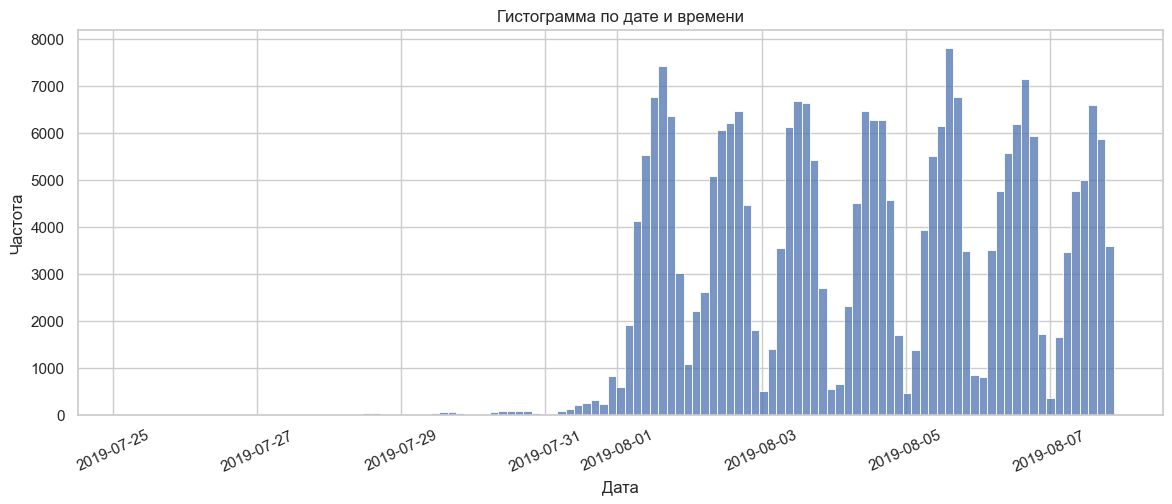

In [15]:
# Задаю размер графика:
plt.subplots(figsize=(14, 5))
# Строю гистограму
sns.histplot(logs_full['date_time'])

plt.title('Гистограмма по дате и времени')
plt.xlabel('Дата')
plt.ylabel('Частота')
plt.xticks(rotation=25)
plt.show()

На гистограме почти нет данных в период с 25.07 по 31.07 включительно, поэтому отброшу данные до 1 августа 2019 года.

В логе осталось 240887 событий


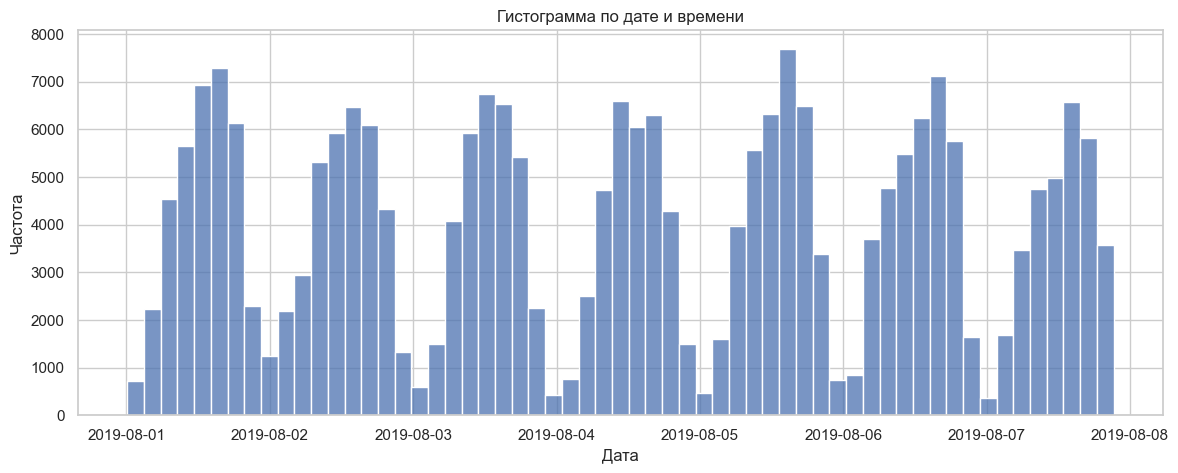

In [16]:
logs = logs_full.loc[logs_full['date'] >= '2019-08-01'].reset_index(drop=True)

# Проверю сколько строк осталось:
print('В логе осталось %d событий' % (logs.shape[0]))

plt.subplots(figsize=(14, 5))
# Строю гистограму
sns.histplot(logs['date_time'])

plt.title('Гистограмма по дате и времени')
plt.xlabel('Дата')
plt.ylabel('Частота')
#plt.xticks(rotation=25)
plt.show()

**Вывод:**

Изначально датасет охватывал период с 25.07.2019 по 08.08.2019, но фактически данных за период 25.07-31.07 почти не было, это связано с техническими особенностяли логов.
По факту, в логах содержатся данные за период с 01.08 по 08.08.  

### Доля отброшенных данных

Много ли событий и пользователей вы потеряли, отбросив старые данные?

In [17]:
# Посчитаю число и долю отброшенных событий и данных:
print('В изначальном логе всего %d событий, все события распределяются на %d категорий' 
      % (logs_full.shape[0], logs_full['event_name'].nunique()))
print('В очищенном логе %d событий, все события распределяются на %d категорий'
      % (logs.shape[0], logs['event_name'].nunique()))
print('Число "потерянных" событий:', (logs_full.shape[0]) - (logs.shape[0]))
print('Доля "потерянных" событий от изначального датафрейма: {:.2%}'.\
      format((logs_full.shape[0] - logs.shape[0]) / logs_full.shape[0]))

В изначальном логе всего 243713 событий, все события распределяются на 5 категорий
В очищенном логе 240887 событий, все события распределяются на 5 категорий
Число "потерянных" событий: 2826
Доля "потерянных" событий от изначального датафрейма: 1.16%


In [18]:
# Посчитаю число и долю отброшенных пользователей:

print('В изначальном логе всего %d уникальных пользователей' % (logs_full['user_id'].nunique()))
print('В очищенном логе %d уникальных пользователей' % (logs['user_id'].nunique()))
print('Число "потерянных" пользователей:', (logs_full['user_id'].nunique() - logs['user_id'].nunique()))
print('Доля "потерянных" пользователей от изначального датафрейма: {:.2%}'.\
      format((logs_full['user_id'].nunique() - logs['user_id'].nunique()) / logs_full['user_id'].nunique()))

В изначальном логе всего 7551 уникальных пользователей
В очищенном логе 7534 уникальных пользователей
Число "потерянных" пользователей: 17
Доля "потерянных" пользователей от изначального датафрейма: 0.23%


### Пользователи в разрезе экспериментальных групп

Проверьте, что у вас есть пользователи из всех трёх экспериментальных групп.

In [19]:
logs.pivot_table(index='exp_id', values='user_id', aggfunc=['nunique', 'count'])

,nunique,count
,user_id,user_id
exp_id,,
246,2484,79302
247,2513,77022
248,2537,84563


**Вывод:**

В ходе изучения и проверки данных обнаружил, что изначально датасет охватывал период с 25.07.2019 по 08.08.2019, но фактически данных за период 25.07-31.07 почти не было, это связано с техническими особенностяли логов.
По факту, в логах содержатся данные за период с 01.08 по 08.08. После исключения периода 25.07-31.07 потерял 1.16% данных и 0.23% пользователей. 

После исключения данных остались пользователи в разрезе всех групп и событий. 

[Оглавление](#section_id)

## Воронка событий
<a id='section_id4'></a>

### Категории событий 
Посмотрите, какие события есть в логах, как часто они встречаются. Отсортируйте события по частоте.

In [20]:
logs['event_name'].value_counts()

mainscreenappear           117328
offersscreenappear          46333
cartscreenappear            42303
paymentscreensuccessful     33918
tutorial                     1005
Name: event_name, dtype: int64

### Пользователи в разрезе категорий событий
Посчитайте, сколько пользователей совершали каждое из этих событий. Отсортируйте события по числу пользователей. Посчитайте долю пользователей, которые хоть раз совершали событие.

In [21]:
# Посмотрю распределение уникальных пользователей в разрезе 5 событий:
users = logs.pivot_table(index='event_name', values='user_id', aggfunc='nunique')\
    .sort_values(by='user_id', ascending=False).reset_index()
# Доля пользователей в разрезе категорий событий:
users['user_share'] = users['user_id'] / logs['user_id'].nunique()
users

,event_name,user_id,user_share
0,mainscreenappear,7419,0.98
1,offersscreenappear,4593,0.61
2,cartscreenappear,3734,0.50
3,paymentscreensuccessful,3539,0.47
4,tutorial,840,0.11


Как обычно, учебное пособие мало кто читает - в нашем случае около 11% уникальных пользователей. 98% или 7 419 пользователей хоть раз совершали какое-либо событие. 

### Порядок событий

Предположите, в каком порядке происходят события. Все ли они выстраиваются в последовательную цепочку? Их не нужно учитывать при расчёте воронки.

Из 5 событий, 4 выстраиваются в последовательную цепочку: 
1. появление главного экрана, 
2. предложение, 
3. корзина, 
4. покупка. 

Обучение должно появляться после главного экрана, но его можно пропустить.

### Воронка событий

По воронке событий посчитайте, какая доля пользователей проходит на следующий шаг воронки (от числа пользователей на предыдущем). То есть для последовательности событий A → B → C посчитайте отношение числа пользователей с событием B к количеству пользователей с событием A, а также отношение числа пользователей с событием C к количеству пользователей с событием B.

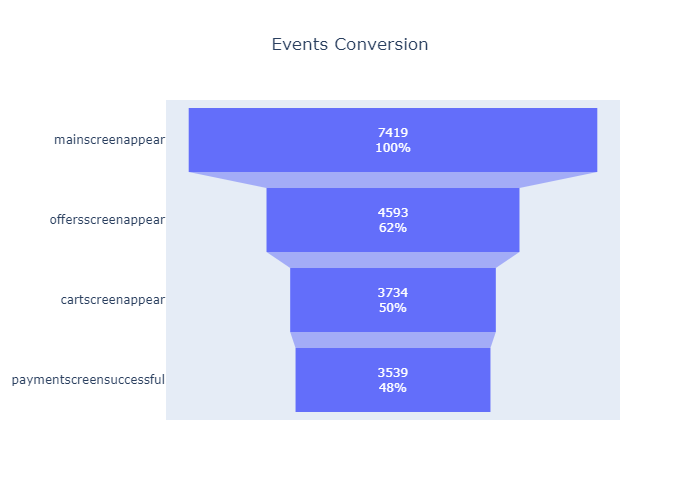

In [22]:
funnel = users.copy()
funnel = funnel.loc[:3]
funnel = funnel[['event_name', 'user_id']]

fig = go.Figure(
    go.Funnel(
        y = funnel['event_name'].to_list(),
        x = funnel['user_id'].to_list(),
        textinfo = "value+percent initial"
    )
)

fig.update_layout(title='Events Conversion', title_x = 0.5)
fig.show('png')

### Потеря пользователей в разрезе шагов

На каком шаге теряете больше всего пользователей?

На графике воронки видно, что на шаге после появления главного экрана теряются больше всего пользователей ~38%. 

### Доля оплативших пользователей от первого события
Какая доля пользователей доходит от первого события до оплаты?

In [23]:
funnel['share_from_first'] = (funnel['user_id'] / 
    (funnel[funnel['event_name'] == 'mainscreenappear']['user_id'].to_list()))
funnel

,event_name,user_id,share_from_first
0,mainscreenappear,7419,1.00
1,offersscreenappear,4593,0.62
2,cartscreenappear,3734,0.50
3,paymentscreensuccessful,3539,0.48


От первого события до оплаты доходит 48% пользователей.

**Вывод:**
    
В логах содержатся данные 5 событий, 4 из которых выстраиваются в последовательную цепочку: 
1. появление главного экрана, 
2. предложение, 
3. корзина, 
4. покупка. 

Пятое событие - "обучение" вероятно появлятется после главного экрана, но его можно пропустить.

На графике воронки хорошо видно, что бОльшая часть пользователей теряется после появления главного экрана ~38%.
Доля оплативших пользователей от первого события составляет 48%.

[Оглавление](#section_id)

## Результаты эксперимента
<a id='section_id5'></a>

### Пользователи в разрезе экспериментальных групп

Сколько пользователей в каждой экспериментальной группе?

In [24]:
user_per_exp = logs.pivot_table(index='exp_id', values='user_id', aggfunc='nunique').reset_index()\
    .rename(columns={'user_id': 'user_count'})

#Добавлю объединённую контрольную группу (249) для дальнейшего анализа:
user_per_exp.loc[3] = [249, user_per_exp.loc[0, 'user_count'] + user_per_exp.loc[1, 'user_count']]
user_per_exp

,exp_id,user_count
0,246,2484
1,247,2513
2,248,2537
3,249,4997


**Вывод:**

В 3 экспериментальных группах примерно поровну уникальных пользователей.

### А/А-тест, группы 246 и 247

Есть 2 контрольные группы для А/А-эксперимента, чтобы проверить корректность всех механизмов и расчётов. Проверьте, находят ли статистические критерии разницу между выборками 246 и 247.

Критерии теста:
* Число пользователей в группах различается не более, чем на 1%
* Для всех групп фиксируют и отправляют в аналитические системы данные об одних сущностях
* Различие ключевых метрик по группам не превышает 1% и не имеет статистической значимости
* Попавший в одну из групп посетитель остаётся в этой группе до конца теста. Если пользователь видит разные версии страницы приложения в ходе одного исследования, невозможно идентифицировать, какая именно повлияла на его решения. Значит, и результаты такого теста нельзя интерпретировать однозначно.

In [25]:
# Посмотрю как отличается число пользователей групп 246 и 247:
((user_per_exp[user_per_exp['exp_id'] == 247]['user_count'].sum() / 
user_per_exp[user_per_exp['exp_id'] == 246]['user_count'].sum() - 1) * 100)

1.1674718196457379

In [26]:
# Посмотрю на число людей по группам и по видам событий:
logs.query('event_name != "tutorial"').pivot_table(index='event_name', columns='exp_id',values='user_id',
                    aggfunc='nunique').sort_values(by=246, ascending=False).reset_index()

exp_id,event_name,246,247,248
0,mainscreenappear,2450,2476,2493
1,offersscreenappear,1542,1520,1531
2,cartscreenappear,1266,1238,1230
3,paymentscreensuccessful,1200,1158,1181


Визуализирую распределение людей по группам и событиям и построю график воронки

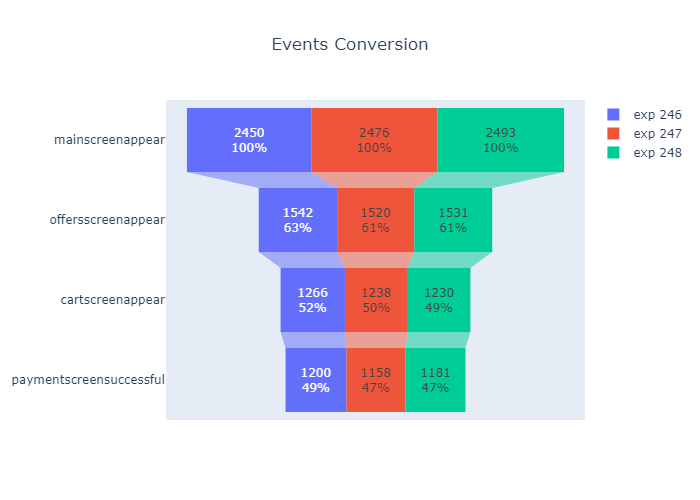

In [27]:
# Переменные для построения графика:
funnel_246 = logs.query('exp_id == 246 and event_name != "tutorial"')\
                 .groupby('event_name')['user_id'].nunique().sort_values(ascending=False).reset_index()\
                 .rename(columns={'user_id': 'total_users'})
funnel_247 = logs.query('exp_id == 247 and event_name != "tutorial"')\
                 .groupby('event_name')['user_id'].nunique().sort_values(ascending=False).reset_index()\
                 .rename(columns={'user_id': 'total_users'})
funnel_248 = logs.query('exp_id == 248 and event_name != "tutorial"')\
                 .groupby('event_name')['user_id'].nunique().sort_values(ascending=False).reset_index()\
                 .rename(columns={'user_id': 'total_users'})

# Построю график воронки:
fig = go.Figure()

fig.add_trace(go.Funnel(
    name = 'exp 246',
    y = funnel_246['event_name'],
    x = funnel_246['total_users'],
    textinfo = "value+percent initial"
    ))

fig.add_trace(go.Funnel(
    name = 'exp 247',
    y = funnel_247['event_name'],
    x = funnel_247['total_users'],
    textinfo = "value+percent initial"
    ))

fig.add_trace(go.Funnel(
    name = 'exp 248',
    y = funnel_248['event_name'],
    x = funnel_248['total_users'],
    textinfo = "value+percent initial"
    ))

fig.update_layout(title='Events Conversion', title_x = 0.5)
fig.show('png')

Визуально график выглядит почти идеально симметричным.

Для проверки того, что пользователи не кочуют из одной группы в другую, сгруппирую логи по пользователям и посчитаю число уникальных групп по каждому, далее оставлю срез данных с числом групп, превышающих единицу. Если такие данные будут, значит есть пересечение пользователей между группами и их нужно исключать.

In [28]:
logs.groupby('user_id')['exp_id'].nunique().reset_index().query('exp_id > 1')

,user_id,exp_id


**Вывод:**

Критерии проведения А/А теста не идеально, но всё же соблюдены. Пересечений пользователей между экспериментальными группами нет.

### Самое популярное событие

1. Выберите самое популярное событие. Посчитайте число пользователей, совершивших это событие в каждой из контрольных групп. Посчитайте долю пользователей, совершивших это событие. 
2. Проверьте, будет ли отличие между группами статистически достоверным. Проделайте то же самое для всех других событий (удобно обернуть проверку в отдельную функцию).
3. Можно ли сказать, что разбиение на группы работает корректно?

#### Выберите самое популярное событие

In [29]:
popular_event = logs.query('event_name != "tutorial"').pivot_table(index='event_name', columns='exp_id',values='user_id',
                    aggfunc='nunique').sort_values(by=246, ascending=False).reset_index()

popular_event['share_246'] = (popular_event[246] / 
    logs.query('event_name != "tutorial" and exp_id == 246')['user_id'].nunique() * 100)
popular_event['share_247'] = (popular_event[247] / 
    logs.query('event_name != "tutorial" and exp_id == 247')['user_id'].nunique() * 100)
popular_event['share_248'] = (popular_event[248] / 
    logs.query('event_name != "tutorial" and exp_id == 248')['user_id'].nunique() * 100)

popular_event['total_unique_users'] = popular_event[[246, 247, 248]].sum(axis=1)
popular_event['share_total_unique_users'] = popular_event['total_unique_users'] / logs['user_id'].nunique() * 100

# Добавление объединённой контрольной группы для дальнейшего анализа:
popular_event[249] = popular_event[246] + popular_event[247] 

popular_event

exp_id,event_name,246,247,248,share_246,share_247,share_248,total_unique_users,share_total_unique_users,249
0,mainscreenappear,2450,2476,2493,98.67,98.57,98.34,7419,98.47,4926
1,offersscreenappear,1542,1520,1531,62.10,60.51,60.39,4593,60.96,3062
2,cartscreenappear,1266,1238,1230,50.99,49.28,48.52,3734,49.56,2504
3,paymentscreensuccessful,1200,1158,1181,48.33,46.10,46.59,3539,46.97,2358


Самое популярное событие - главный экран.

#### Статистическое отличие между группами

Проверьте, будет ли отличие между группами статистически достоверным. Проделайте то же самое для всех других событий (удобно обернуть проверку в отдельную функцию).

In [30]:
# Переведу колонки в индекс для работы функции:
user_per_exp.set_index('exp_id', inplace=True)
popular_event.set_index('event_name', inplace=True)

# Выведу датафреймы 
display(popular_event)
display(user_per_exp)

exp_id,246,247,248,share_246,share_247,share_248,total_unique_users,share_total_unique_users,249
event_name,,,,,,,,,
mainscreenappear,2450,2476,2493,98.67,98.57,98.34,7419,98.47,4926
offersscreenappear,1542,1520,1531,62.10,60.51,60.39,4593,60.96,3062
cartscreenappear,1266,1238,1230,50.99,49.28,48.52,3734,49.56,2504
paymentscreensuccessful,1200,1158,1181,48.33,46.10,46.59,3539,46.97,2358


,user_count
exp_id,
246,2484
247,2513
248,2537
249,4997


In [31]:
# Использую Z-критерий и напишу функцию для всех событий
def z_test(exp1, exp2, event, alpha):
    
    # Переменные для упрощения дальнейшего кода:
    events_1 = popular_event.loc[event, exp1]
    events_2 = popular_event.loc[event, exp2]
    users_1 = user_per_exp.loc[exp1, 'user_count']
    users_2 = user_per_exp.loc[exp2, 'user_count']
    
    # пропорции успехов по 2 группам:
    p1 = events_1 / users_1
    p2 = events_2 / users_2
     
    # пропорция успехов в комбинированном датасете:
    p_combined = (events_1 + events_2) / (users_1 + users_2)
    # разница пропорций в датасетах:
    difference = p1 - p2
    # считаюю статистику в ст.отклонениях стандартного нормального распределения
    z_value = difference / mth.sqrt(p_combined * (1 - p_combined) * (1 / users_1 + 1 / users_2))
    # задаю стандартное нормальное распределение (среднее 0, ст.отклонение 1)
    distr = st.norm(0, 1)
    p_value = (1 - distr.cdf(abs(z_value))) * 2
    print('Проверка для групп {} и {}, событие: {}, p-значение: {p_value:}'.format(exp1, exp2, event, p_value=p_value))
    if (p_value < alpha):
        print("Отвергаем нулевую гипотезу: между группами есть статистическая разница")
    else:
        print("Не получилось отвергнуть нулевую гипотезу: между группами нет статистической разницы")

Сформулирую гипотезы:
* H0 - доли уникальных посетителей, побывавших на этапе воронки, **одинаковы**.
* H1 - между долями уникальных посетителей, побывавших на этапе воронки, есть значимая **разница**.

In [32]:
for event in popular_event.index:
    z_test(246, 247, event, 0.05)
    print()

Проверка для групп 246 и 247, событие: mainscreenappear, p-значение: 0.7570597232046099
Не получилось отвергнуть нулевую гипотезу: между группами нет статистической разницы

Проверка для групп 246 и 247, событие: offersscreenappear, p-значение: 0.2480954578522181
Не получилось отвергнуть нулевую гипотезу: между группами нет статистической разницы

Проверка для групп 246 и 247, событие: cartscreenappear, p-значение: 0.22883372237997213
Не получилось отвергнуть нулевую гипотезу: между группами нет статистической разницы

Проверка для групп 246 и 247, событие: paymentscreensuccessful, p-значение: 0.11456679313141849
Не получилось отвергнуть нулевую гипотезу: между группами нет статистической разницы



**Вывод:**

Вывод о различии долей (конверсии) по группам 246 и 247 сделать нельзя.

### Группа с изменённым шрифтом
1. Аналогично поступите с группой с изменённым шрифтом. Сравните результаты с каждой из контрольных групп в отдельности по каждому событию. 
2. Сравните результаты с объединённой контрольной группой. Какие выводы из эксперимента можно сделать?

#### Сравнение экспериментальной и контрольных групп

Сформулирую гипотезы:
* Н0: Конверсия в разрезе событий в группе 246 **равна** конверсии в группе 248
* Н1: Конверсия в разрезе событий в группе 246 **не равна** конверсии в группе 248

In [33]:
for event in popular_event.index:
    z_test(246, 248, event, 0.05)
    print()

Проверка для групп 246 и 248, событие: mainscreenappear, p-значение: 0.2949721933554552
Не получилось отвергнуть нулевую гипотезу: между группами нет статистической разницы

Проверка для групп 246 и 248, событие: offersscreenappear, p-значение: 0.20836205402738917
Не получилось отвергнуть нулевую гипотезу: между группами нет статистической разницы

Проверка для групп 246 и 248, событие: cartscreenappear, p-значение: 0.07842923237520116
Не получилось отвергнуть нулевую гипотезу: между группами нет статистической разницы

Проверка для групп 246 и 248, событие: paymentscreensuccessful, p-значение: 0.2122553275697796
Не получилось отвергнуть нулевую гипотезу: между группами нет статистической разницы



---
Сформулирую гипотезы:
* Н0: Конверсия в разрезе событий в группе 247 **равна** конверсии в группе 248
* Н0: Конверсия в разрезе событий в группе 247 **не равна** конверсии в группе 248

In [34]:
for event in popular_event.index:
    z_test(247, 248, event, 0.05)
    print()

Проверка для групп 247 и 248, событие: mainscreenappear, p-значение: 0.4587053616621515
Не получилось отвергнуть нулевую гипотезу: между группами нет статистической разницы

Проверка для групп 247 и 248, событие: offersscreenappear, p-значение: 0.9197817830592261
Не получилось отвергнуть нулевую гипотезу: между группами нет статистической разницы

Проверка для групп 247 и 248, событие: cartscreenappear, p-значение: 0.5786197879539783
Не получилось отвергнуть нулевую гипотезу: между группами нет статистической разницы

Проверка для групп 247 и 248, событие: paymentscreensuccessful, p-значение: 0.7373415053803964
Не получилось отвергнуть нулевую гипотезу: между группами нет статистической разницы



**Вывод:**

Вывод о различии долей (конверсии) по парам групп 246 и 248, 247 и 248 сделать нельзя.

#### Сравнение экспериментальной и объединённой контрольной группой

Сформулирую гипотезы:
* Н0: Конверсия в разрезе событий в объединённой группе 249 **равна** конверсии в группе 248
* Н0: Конверсия в разрезе событий в объединённой группе 249 **не равна** конверсии в группе 248

In [35]:
for event in popular_event.index:
    z_test(249, 248, event, 0.05)
    print()

Проверка для групп 249 и 248, событие: mainscreenappear, p-значение: 0.29424526837179577
Не получилось отвергнуть нулевую гипотезу: между группами нет статистической разницы

Проверка для групп 249 и 248, событие: offersscreenappear, p-значение: 0.43425549655188256
Не получилось отвергнуть нулевую гипотезу: между группами нет статистической разницы

Проверка для групп 249 и 248, событие: cartscreenappear, p-значение: 0.18175875284404386
Не получилось отвергнуть нулевую гипотезу: между группами нет статистической разницы

Проверка для групп 249 и 248, событие: paymentscreensuccessful, p-значение: 0.6004294282308704
Не получилось отвергнуть нулевую гипотезу: между группами нет статистической разницы



**Вывод:**

Вывод о различии долей (конверсии) по объединённой группе 249 и 248 сделать нельзя.

### Уровень значимости при проверке статистических гипотез

* Какой уровень значимости вы выбрали при проверке статистических гипотез выше? 
    * При проверке статистических гипотез выше выбрал уровень значимости равный 0.05.
* Посчитайте, сколько проверок статистических гипотез вы сделали. При уровне значимости 0.1 каждый десятый раз можно получать ложный результат. 
    * Было проведено 4 А/А теста и 12 А/В теста.
* Какой уровень значимости стоит применить? Если вы хотите изменить его, проделайте предыдущие пункты и проверьте свои выводы.
    * Применю поправку Бонферрони и поделю уровень значимости на количество тестов (16)
---
Сформулирую гипотезы:
* Н0: Конверсия в разрезе событий в группе 246 **равна** конверсии в группе 247
* Н0: Конверсия в разрезе событий в группе 246 **не равна** конверсии в группе 247

In [36]:
for event in popular_event.index:
    z_test(246, 247, event, 0.05/16)
    print()

Проверка для групп 246 и 247, событие: mainscreenappear, p-значение: 0.7570597232046099
Не получилось отвергнуть нулевую гипотезу: между группами нет статистической разницы

Проверка для групп 246 и 247, событие: offersscreenappear, p-значение: 0.2480954578522181
Не получилось отвергнуть нулевую гипотезу: между группами нет статистической разницы

Проверка для групп 246 и 247, событие: cartscreenappear, p-значение: 0.22883372237997213
Не получилось отвергнуть нулевую гипотезу: между группами нет статистической разницы

Проверка для групп 246 и 247, событие: paymentscreensuccessful, p-значение: 0.11456679313141849
Не получилось отвергнуть нулевую гипотезу: между группами нет статистической разницы



---
Сформулирую гипотезы:
* Н0: Конверсия в разрезе событий в группе 246 **равна** конверсии в группе 248
* Н0: Конверсия в разрезе событий в группе 246 **не равна** конверсии в группе 248

In [37]:
for event in popular_event.index:
    z_test(246, 248, event, 0.05/16)
    print()

Проверка для групп 246 и 248, событие: mainscreenappear, p-значение: 0.2949721933554552
Не получилось отвергнуть нулевую гипотезу: между группами нет статистической разницы

Проверка для групп 246 и 248, событие: offersscreenappear, p-значение: 0.20836205402738917
Не получилось отвергнуть нулевую гипотезу: между группами нет статистической разницы

Проверка для групп 246 и 248, событие: cartscreenappear, p-значение: 0.07842923237520116
Не получилось отвергнуть нулевую гипотезу: между группами нет статистической разницы

Проверка для групп 246 и 248, событие: paymentscreensuccessful, p-значение: 0.2122553275697796
Не получилось отвергнуть нулевую гипотезу: между группами нет статистической разницы



---
Сформулирую гипотезы:
* Н0: Конверсия в разрезе событий в группе 247 **равна** конверсии в группе 248
* Н0: Конверсия в разрезе событий в группе 247 **не равна** конверсии в группе 248

In [38]:
for event in popular_event.index:
    z_test(247, 248, event, 0.05/16)
    print()

Проверка для групп 247 и 248, событие: mainscreenappear, p-значение: 0.4587053616621515
Не получилось отвергнуть нулевую гипотезу: между группами нет статистической разницы

Проверка для групп 247 и 248, событие: offersscreenappear, p-значение: 0.9197817830592261
Не получилось отвергнуть нулевую гипотезу: между группами нет статистической разницы

Проверка для групп 247 и 248, событие: cartscreenappear, p-значение: 0.5786197879539783
Не получилось отвергнуть нулевую гипотезу: между группами нет статистической разницы

Проверка для групп 247 и 248, событие: paymentscreensuccessful, p-значение: 0.7373415053803964
Не получилось отвергнуть нулевую гипотезу: между группами нет статистической разницы



---
Сформулирую гипотезы:
* Н0: Конверсия в разрезе событий в объединённой группе 249 **равна** конверсии в группе 248
* Н0: Конверсия в разрезе событий в объединённой группе 249 **не равна** конверсии в группе 248

In [39]:
for event in popular_event.index:
    z_test(249, 248, event, 0.05/16)
    print()

Проверка для групп 249 и 248, событие: mainscreenappear, p-значение: 0.29424526837179577
Не получилось отвергнуть нулевую гипотезу: между группами нет статистической разницы

Проверка для групп 249 и 248, событие: offersscreenappear, p-значение: 0.43425549655188256
Не получилось отвергнуть нулевую гипотезу: между группами нет статистической разницы

Проверка для групп 249 и 248, событие: cartscreenappear, p-значение: 0.18175875284404386
Не получилось отвергнуть нулевую гипотезу: между группами нет статистической разницы

Проверка для групп 249 и 248, событие: paymentscreensuccessful, p-значение: 0.6004294282308704
Не получилось отвергнуть нулевую гипотезу: между группами нет статистической разницы



**Вывод:**

При применении поправки Бонферрони результаты теста не меняются, так как и до поправки р-значение всегда было больше уровня статистической значимости.

[Оглавление](#section_id)

## Результаты исследования
<a id='section_id6'></a>

Для проведения A/A/B тестирования групп пользователей мобильного приложения использовал логи за период 25.07.2019-08.08.2019.

**Предобработка**

В ходе предобработки переименованы названия колонок, названия собыитй преведены к нижнему регистру, добавлены колонки с датой и датой и временем, удалены явные дубликаты.

**Изучение и проверка**

В ходе изучения и проверки данных обнаружил, что изначально датасет охватывал период с 25.07.2019 по 08.08.2019, но фактически данных за период 25.07-31.07 почти не было, это связано с техническими особенностяли логов.
По факту, в логах содержатся данные за период с 01.08 по 08.08. После исключения периода 25.07-31.07 потерял 1.16% данных и 0.23% пользователей. 

После исключения данных остались пользователи в разрезе всех групп и событий. 

**Изучение воронки событий**

В логах содержатся данные 5 событий, 4 из которых выстраиваются в последовательную цепочку: 
1. появление главного экрана, 
2. предложение, 
3. корзина, 
4. покупка. 

Пятое событие - "обучение" вероятно появлятется после главного экрана, но его можно пропустить.

БОльшая часть пользователей теряется после появления главного экрана ~38%. Доля оплативших пользователей от первого события составляет 48%.

**Результаты эксперимента**

В 3 экспериментальных группах примерно поровну уникальных пользователей. Пересечений пользователей между группами нет. Самое популярное событие - главный экран.

Необходимо было проверить, будет ли отличие между группами статистически достоверным в разрезе всех событий.
Для проверки статистически значимого отличия использовал z-критерий, а для автоматизации проведения теста написал функцию.

В результате было проведено 16 тестов (4 А/А и 12 А/В, уровень значимости выбран 0.05) , в рамках тестирования ни разу не удалось отвергнуть нулевую гипотезу и подтвердить статистическую разницу между группами и событиями.

Также была применена поправа Бонферрони - поделил уровень значимости на число сравнений (16). С применением поправки результаты также не поменялись.

Если конверсии (доли) во всех группах примерно равны и статистически значимых разниц нет, то **можно завершить тест и признать, что изменения не принесли результата.**